# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [5]:
%matplotlib inline
# import numpy and pandas

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import re

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [6]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [7]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [8]:
# Your code here:

fifa['ValueNumeric'] = fifa['Value'].apply(lambda x: float(re.sub('[^0-9\.]','', x)))
fifa_2 = fifa[['ValueNumeric', 'Preferred Foot', 'Position', 'Nationality']]
fifa_2 = fifa_2.rename(columns={'Preferred Foot':'Preferred_foot'})
fifa_2 = fifa_2.dropna()
fifa_2.head()

,ValueNumeric,Preferred_foot,Position,Nationality
0,110.5,Left,RF,Argentina
1,77.0,Right,ST,Portugal
2,118.5,Right,LW,Brazil
3,72.0,Right,GK,Spain
4,102.0,Right,RCM,Belgium


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [9]:
# Your code here:

modelo = ols('ValueNumeric ~ C(Position) * C(Preferred_foot)', data = fifa_2).fit()
tabla_anova=sm.stats.anova_lm(modelo, typ=1)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),26.0,9.006867e+06,346417.962922,4.143877,7.064170e-12
C(Preferred_foot),1.0,7.292211e+04,72922.110443,0.872300,3.503319e-01
C(Position):C(Preferred_foot),26.0,3.050243e+06,117317.045252,1.403355,8.327900e-02
Residual,18093.0,1.512530e+09,83597.550120,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:

# Hipótesis Nula: Las medias son las mismas.
# El pvalue de C(Position):C(Preferred_foot) es mayor a 0.05, por lo tanto no hay correlación.
# El pvalue para Preferred_foot is mayor a 0.05, por lo que hay alguna correlación entre Preferred_foot y ValueNumeric.
# El pvalue para Position es menor que 0.05, por lo tanto no hay correlación entre Preferred_foot y ValueNumeric.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [10]:
# Your code here:

modelo = ols('ValueNumeric ~ C(Nationality)', data=fifa_2).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=1)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,4.214794e+07,258576.326284,3.136552,7.514368e-37
Residual,17983.0,1.482513e+09,82439.668880,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# El pvalue indica que la nacionalidad no es significativa, por lo tanto se rechaza la
# hipótesis nula.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [11]:
# Your code here:

fifa = fifa.dropna()
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [12]:
# Your code here:

x = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
y = fifa['ValueNumeric']
modelo=sm.OLS(y, x).fit()
modelo.summary()

C:\Users\Eleazar Pérez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Wed, 26 Feb 2020   Prob (F-statistic):             0.0116
Time:                        01:02:33   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:
# R2 es demasiado pequeño y no funciona como un buen modelo de predicción.
# Como consequencia de lo grande que es el valor de F, existe una importante variación.

modelo = ols('ValueNumeric ~ Stamina * SprintSpeed', data=fifa).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=1)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
Stamina,1.0,5.085148e+05,5.085148e+05,6.102225,1.351042e-02
SprintSpeed,1.0,2.411205e+05,2.411205e+05,2.893469,8.895662e-02
Stamina:SprintSpeed,1.0,1.480610e+07,1.480610e+07,177.674507,2.428838e-40
Residual,17914.0,1.492822e+09,8.333270e+04,NaN,NaN


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [14]:
# Your code here:

x = sm.add_constant(fifa[['Potential']])
y = fifa['ValueNumeric']
modelo = sm.OLS(y, x).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          9.15e-225
Time:                        01:11:09   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:

# Hay un valor bastante alto en F. Esto significa que hay una amplia varianza entre las muestras.
# R2 es muy pequeño.
# Removiendo valores constantes podemos obtener un mejor modelo.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [15]:
# Your code here:

print(modelo.fvalue, modelo.f_pvalue, modelo.rsquared)

1054.2293002766498 9.154945285015248e-225 0.05557282854041601


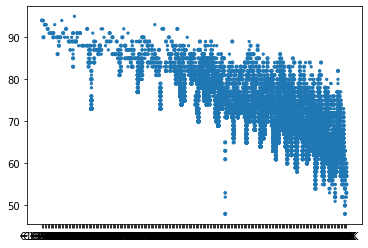

In [27]:
plt.scatter(fifa['Value'], fifa['Potential'], s = (10,5));